In [70]:
from matplotlib import pyplot as plt

In [71]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [72]:
import pandas as pd

# Data Merge

In [73]:
heart_data = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [74]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [75]:
heart_data.head()

,age,sex,chest_pain_type,blood_pressure,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,output
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [76]:
heart_data.shape

(1190, 12)

In [77]:
heart_data.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
blood_pressure             0
cholesterol                0
fasting_blood_sugar        0
restecg                    0
max_heart_rate             0
exercise_induced_angina    0
oldpeak                    0
slope                      0
output                     0
dtype: int64

In [78]:
heart_data['age'].value_counts()

age
54    67
58    58
57    50
52    47
55    47
59    47
56    47
51    47
62    46
60    44
53    40
48    38
61    38
63    37
41    33
50    32
64    31
43    31
46    31
44    29
65    29
49    27
42    26
45    25
67    23
47    23
66    19
39    18
38    17
69    16
40    16
35    14
37    13
68    13
70    11
34     9
74     8
71     8
36     6
32     5
72     4
29     4
77     3
75     3
76     3
33     2
31     2
30     1
28     1
73     1
Name: count, dtype: int64

# drop unwanted columns

In [79]:
#df = heart_data.drop(['school', 'address','reason', 'traveltime', 'nursery', 'internet'], axis = 1)

In [80]:
heart_data.shape
df=heart_data

In [81]:
df

,age,sex,chest_pain_type,blood_pressure,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,output
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [82]:
df.head()


,age,sex,chest_pain_type,blood_pressure,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,output
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1190 non-null   int64  
 1   sex                      1190 non-null   int64  
 2   chest_pain_type          1190 non-null   int64  
 3   blood_pressure           1190 non-null   int64  
 4   cholesterol              1190 non-null   int64  
 5   fasting_blood_sugar      1190 non-null   int64  
 6   restecg                  1190 non-null   int64  
 7   max_heart_rate           1190 non-null   int64  
 8   exercise_induced_angina  1190 non-null   int64  
 9   oldpeak                  1190 non-null   float64
 10  slope                    1190 non-null   int64  
 11  output                   1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [84]:
from pathlib import Path
IMAGES_PATH = Path() / "images/question 2"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

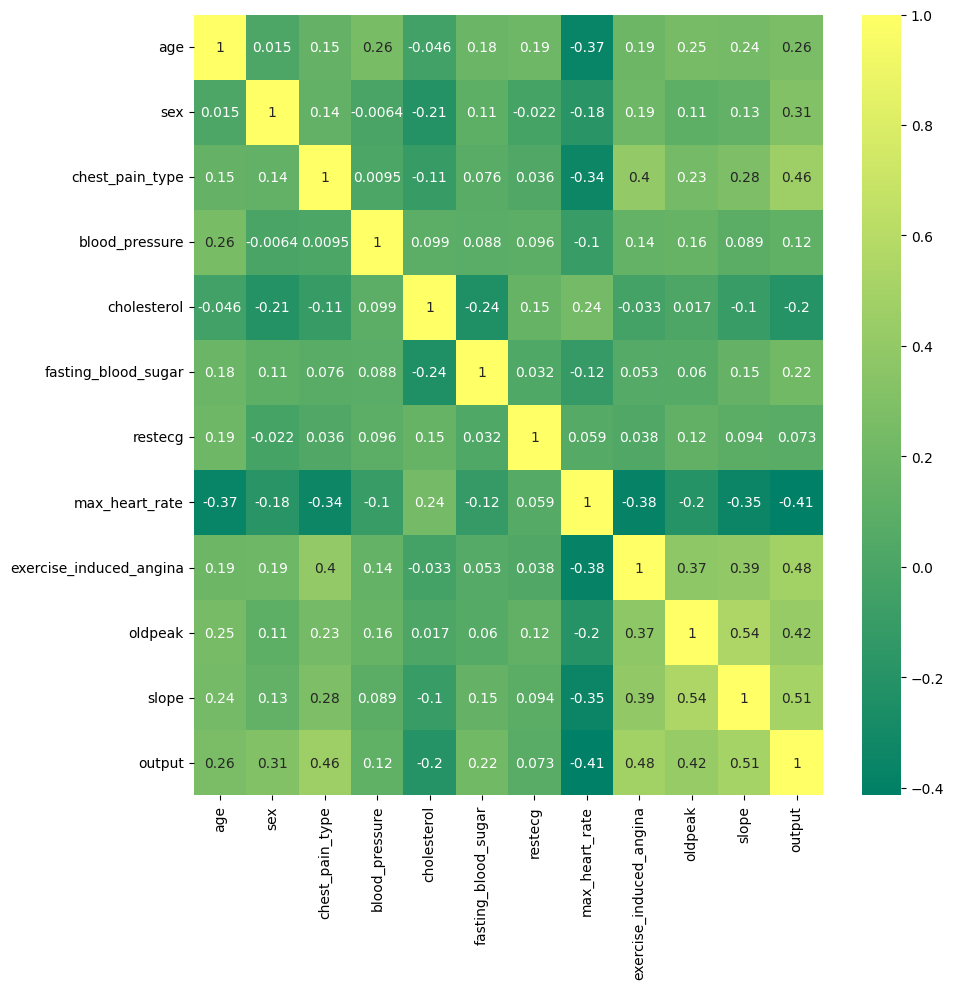

In [85]:
corr_matrix = df.corr()
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix, annot = True, cmap = 'summer')
save_fig('correlation')
plt.show()

In [125]:
# Let's sort it in descending order to identify the attributes that are strongly correlated
corr_matrix["output"].sort_values(ascending=False)

output                     1.000000
slope                      0.505608
exercise_induced_angina    0.481467
chest_pain_type            0.460127
oldpeak                    0.418707
sex                        0.311267
age                        0.262029
fasting_blood_sugar        0.216695
blood_pressure             0.121415
restecg                    0.073059
cholesterol               -0.198366
max_heart_rate            -0.413278
Name: output, dtype: float64

In [126]:
absolute_corr_matrix = abs(corr_matrix)
absolute_corr_matrix["output"].sort_values(ascending=False)

output                     1.000000
slope                      0.505608
exercise_induced_angina    0.481467
chest_pain_type            0.460127
oldpeak                    0.418707
max_heart_rate             0.413278
sex                        0.311267
age                        0.262029
fasting_blood_sugar        0.216695
cholesterol                0.198366
blood_pressure             0.121415
restecg                    0.073059
Name: output, dtype: float64

In [86]:
df.shape

(1190, 12)

In [87]:
#Take average of the grades in a new column
#df['avg_grade'] = (df['G1'] + df['G2'] + df['G3'])/60
#Remove columns G1,G2, and G3
#df = df.drop(['G1', 'G2', 'G3'], axis = 1)

In [88]:
#Add daily and weekend alcohol consumption

#df.loc[(df['Dalc'] + df['Walc'] >= 4), 'alc'] = 1
#df.loc[(df['Dalc'] + df['Walc'] < 4), 'alc'] = 0

#Remove columns Dalc and Walc
#df = df.drop(['Dalc', 'Walc'], axis = 1)


In [89]:
df.shape

(1190, 12)

In [90]:
df.head()

,age,sex,chest_pain_type,blood_pressure,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,output
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


# test and train split [trainSet, testSet]

In [91]:
from sklearn.model_selection import train_test_split
trainSet, testSet = train_test_split(df, test_size = 0.2, random_state = 42)

In [92]:
trainSet.shape
testSet.shape

#download the train and test sets
trainSet.to_csv(r'TrainSet.csv', index = False)
testSet.to_csv(r'TestSet.csv', index = False)

In [93]:
trainSet

,age,sex,chest_pain_type,blood_pressure,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,output
1005,63,1,4,130,330,1,2,132,1,1.8,1,1
224,33,1,3,120,298,0,0,185,0,0.0,1,0
798,56,0,4,134,409,0,2,150,1,1.9,2,1
816,77,1,4,125,304,0,2,162,1,0.0,1,1
427,56,1,2,126,166,0,1,140,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1044,58,1,4,125,300,0,2,171,0,0.0,1,1
1095,55,1,2,130,262,0,0,155,0,0.0,1,0
1130,61,1,1,134,234,0,0,145,0,2.6,2,1
860,62,0,4,140,268,0,2,160,0,3.6,3,1


# Profiling

In [94]:
#from pandas_profiling import ProfileReport
#prof = ProfileReport(df)
#prof.to_file(output_file='pandasProfile.html')

# code for higher quality images


code for higher quality images


In [95]:
import os
from pathlib import Path

IMAGES_PATH = Path()
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [96]:
#from pandas_profiling import ProfileReport
#prof = ProfileReport(testSet)
#prof.to_file(output_file='output.html')

# Read train and test set

In [97]:
trainSet = pd.read_csv('TrainSet.csv')
#trainSetCat = trainSet[['sex','famsize','Pstatus','Mjob','Fjob','guardian','schoolsup','famsup','paid','activities','higher','romantic']]
#trainSetCat.head(10)


In [98]:
testSet = pd.read_csv('TestSet.csv')
#testSetCat = testSet[['sex','famsize','Pstatus','Mjob','Fjob','guardian','schoolsup','famsup','paid','activities','higher','romantic']]
#testSetCat.head()

In [99]:
testSet.columns

Index(['age', 'sex', 'chest_pain_type', 'blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'restecg', 'max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope', 'output'],
      dtype='object')

In [100]:
testSet.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
blood_pressure               int64
cholesterol                  int64
fasting_blood_sugar          int64
restecg                      int64
max_heart_rate               int64
exercise_induced_angina      int64
oldpeak                    float64
slope                        int64
output                       int64
dtype: object

In [101]:
#Getting all the categorical and integer features in different lists 
#categorical_features = trainSet.select_dtypes(include="object").columns
#integer_features = trainSet.select_dtypes(include=df).columns

In [102]:
#categorical_features

In [103]:
#integer_features= integer_features.drop(['alc'])


### OneHotEncoder

In [104]:
# categorical values taken in df_category and one hot encoding applied on them through column transformer
trainSet.columns

Index(['age', 'sex', 'chest_pain_type', 'blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'restecg', 'max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope', 'output'],
      dtype='object')

In [105]:
from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import MinMaxScaler

#scaled = ColumnTransformer(#applying pipeline

from sklearn.preprocessing import MinMaxScaler
scaled = ColumnTransformer ([#("dropname", "drop", ["Name"]), 
                                    ("mms", MinMaxScaler(),['blood_pressure', 'cholesterol','max_heart_rate'
                                    ])],
                                    #("onehot", OneHotEncoder(), ["Marital Status"]),
                                    remainder = 'passthrough',
                                    verbose_feature_names_out = False
                                    )

#("int", MinMaxScaler(), trainSet.columns)
#verbose_feature_names_out = False)

In [106]:
#integer_features='blood_pressure', 'cholesterol','max_heart_rate'
#numeric_columns = []
#for col in trainSet.columns:
    #if housing[col].dtype == 'int64' or housing[col].dtype == 'float64':
        #numeric_columns.append(col)

In [107]:
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

#onehot_enc = ColumnTransformer([("cat", OneHotEncoder(), categorical_features),
 #                              ("int", MinMaxScaler(), integer_features)],
  #                             remainder = 'passthrough',
   #                    verbose_feature_names_out = False)

In [108]:
#trainSet[['sex','famsize','Pstatus','Mjob','Fjob','guardian','schoolsup','famsup','paid','activities','higher','romantic']].value_counts()

#onehot_enc




In [109]:
#from sklearn import set_config

In [110]:
from sklearn import set_config
set_config(display = "diagram")
scaled

ColumnTransformer(remainder='passthrough',
                  transformers=[('mms', MinMaxScaler(),
                                 ['blood_pressure', 'cholesterol',
                                  'max_heart_rate'])],
                  verbose_feature_names_out=False)

In [111]:
#Applying fit_transform on Train set 
# df_encoded is updated train set after fit_transform
df_encoded = scaled.fit_transform(trainSet)
df_encoded = pd.DataFrame(df_encoded) # updated dataframe after fit_transform applied
#Applying transform on Test set
testSet = scaled.transform(testSet)
testSet = pd.DataFrame(testSet)

In [112]:
df_encoded

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.650,0.547264,0.507042,63.0,1.0,4.0,1.0,2.0,1.0,1.8,1.0,1.0
1,0.600,0.494196,0.880282,33.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.670,0.678275,0.633803,56.0,0.0,4.0,0.0,2.0,1.0,1.9,2.0,1.0
3,0.625,0.504146,0.718310,77.0,1.0,4.0,0.0,2.0,1.0,0.0,1.0,1.0
4,0.630,0.275290,0.563380,56.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
947,0.625,0.497512,0.781690,58.0,1.0,4.0,0.0,2.0,0.0,0.0,1.0,1.0
948,0.650,0.434494,0.669014,55.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
949,0.670,0.388060,0.598592,61.0,1.0,1.0,0.0,0.0,0.0,2.6,2.0,1.0
950,0.700,0.444444,0.704225,62.0,0.0,4.0,0.0,2.0,0.0,3.6,3.0,1.0


In [113]:
df_encoded.tail()




,0,1,2,3,4,5,6,7,8,9,10,11
947,0.625,0.497512,0.781690,58.0,1.0,4.0,0.0,2.0,0.0,0.0,1.0,1.0
948,0.650,0.434494,0.669014,55.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
949,0.670,0.388060,0.598592,61.0,1.0,1.0,0.0,0.0,0.0,2.6,2.0,1.0
950,0.700,0.444444,0.704225,62.0,0.0,4.0,0.0,2.0,0.0,3.6,3.0,1.0
951,0.600,0.489221,0.718310,42.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0


In [114]:
#Shape of Original Train Set
trainSet.shape

(952, 12)

In [115]:
#Shape of Scaled Train Set 
df_encoded.shape

(952, 12)

In [116]:
#Getting all the column names
scaled.get_feature_names_out()
#scaled.

array(['blood_pressure', 'cholesterol', 'max_heart_rate', 'age', 'sex',
       'chest_pain_type', 'fasting_blood_sugar', 'restecg',
       'exercise_induced_angina', 'oldpeak', 'slope', 'output'],
      dtype=object)

In [117]:
#Rename the Scaled Train Set and Test Set columns
df_encoded.columns = scaled.get_feature_names_out()
testSet.columns = scaled.get_feature_names_out()

In [118]:
df_encoded

,blood_pressure,cholesterol,max_heart_rate,age,sex,chest_pain_type,fasting_blood_sugar,restecg,exercise_induced_angina,oldpeak,slope,output
0,0.650,0.547264,0.507042,63.0,1.0,4.0,1.0,2.0,1.0,1.8,1.0,1.0
1,0.600,0.494196,0.880282,33.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.670,0.678275,0.633803,56.0,0.0,4.0,0.0,2.0,1.0,1.9,2.0,1.0
3,0.625,0.504146,0.718310,77.0,1.0,4.0,0.0,2.0,1.0,0.0,1.0,1.0
4,0.630,0.275290,0.563380,56.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
947,0.625,0.497512,0.781690,58.0,1.0,4.0,0.0,2.0,0.0,0.0,1.0,1.0
948,0.650,0.434494,0.669014,55.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
949,0.670,0.388060,0.598592,61.0,1.0,1.0,0.0,0.0,0.0,2.6,2.0,1.0
950,0.700,0.444444,0.704225,62.0,0.0,4.0,0.0,2.0,0.0,3.6,3.0,1.0


In [119]:
testSet

,blood_pressure,cholesterol,max_heart_rate,age,sex,chest_pain_type,fasting_blood_sugar,restecg,exercise_induced_angina,oldpeak,slope,output
0,0.800,0.000000,0.598592,61.0,1.0,4.0,1.0,1.0,0.0,1.0,2.0,1.0
1,0.600,0.393035,0.633803,54.0,1.0,3.0,0.0,0.0,1.0,1.5,2.0,1.0
2,0.610,0.530680,0.669014,55.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.775,0.567164,0.633803,56.0,1.0,4.0,1.0,0.0,1.0,3.0,2.0,1.0
4,0.750,0.427861,0.683099,60.0,0.0,4.0,0.0,2.0,0.0,2.6,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233,0.625,0.368159,0.528169,59.0,1.0,4.0,0.0,0.0,1.0,2.5,3.0,1.0
234,0.760,0.494196,0.830986,52.0,1.0,1.0,1.0,0.0,0.0,1.2,2.0,0.0
235,0.675,0.414594,0.711268,55.0,0.0,2.0,0.0,2.0,0.0,1.4,2.0,0.0
236,0.750,0.409619,0.492958,43.0,1.0,4.0,0.0,0.0,1.0,2.0,2.0,1.0


In [120]:
#download the scaled train and test sets
df_encoded.to_csv(r'ScaledTrainSet.csv', index = False)
testSet.to_csv(r'ScaledTestSet.csv', index = False)

In [121]:
trainSet

,age,sex,chest_pain_type,blood_pressure,cholesterol,fasting_blood_sugar,restecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,output
0,63,1,4,130,330,1,2,132,1,1.8,1,1
1,33,1,3,120,298,0,0,185,0,0.0,1,0
2,56,0,4,134,409,0,2,150,1,1.9,2,1
3,77,1,4,125,304,0,2,162,1,0.0,1,1
4,56,1,2,126,166,0,1,140,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
947,58,1,4,125,300,0,2,171,0,0.0,1,1
948,55,1,2,130,262,0,0,155,0,0.0,1,0
949,61,1,1,134,234,0,0,145,0,2.6,2,1
950,62,0,4,140,268,0,2,160,0,3.6,3,1


In [122]:
dset = pd.read_csv('ScaledTrainSet.csv')

In [123]:
dset

,blood_pressure,cholesterol,max_heart_rate,age,sex,chest_pain_type,fasting_blood_sugar,restecg,exercise_induced_angina,oldpeak,slope,output
0,0.650,0.547264,0.507042,63.0,1.0,4.0,1.0,2.0,1.0,1.8,1.0,1.0
1,0.600,0.494196,0.880282,33.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.670,0.678275,0.633803,56.0,0.0,4.0,0.0,2.0,1.0,1.9,2.0,1.0
3,0.625,0.504146,0.718310,77.0,1.0,4.0,0.0,2.0,1.0,0.0,1.0,1.0
4,0.630,0.275290,0.563380,56.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
947,0.625,0.497512,0.781690,58.0,1.0,4.0,0.0,2.0,0.0,0.0,1.0,1.0
948,0.650,0.434494,0.669014,55.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
949,0.670,0.388060,0.598592,61.0,1.0,1.0,0.0,0.0,0.0,2.6,2.0,1.0
950,0.700,0.444444,0.704225,62.0,0.0,4.0,0.0,2.0,0.0,3.6,3.0,1.0


In [124]:
dset.info

<bound method DataFrame.info of      blood_pressure  cholesterol  max_heart_rate   age  sex  chest_pain_type  \
0             0.650     0.547264        0.507042  63.0  1.0              4.0   
1             0.600     0.494196        0.880282  33.0  1.0              3.0   
2             0.670     0.678275        0.633803  56.0  0.0              4.0   
3             0.625     0.504146        0.718310  77.0  1.0              4.0   
4             0.630     0.275290        0.563380  56.0  1.0              2.0   
..              ...          ...             ...   ...  ...              ...   
947           0.625     0.497512        0.781690  58.0  1.0              4.0   
948           0.650     0.434494        0.669014  55.0  1.0              2.0   
949           0.670     0.388060        0.598592  61.0  1.0              1.0   
950           0.700     0.444444        0.704225  62.0  0.0              4.0   
951           0.600     0.489221        0.718310  42.0  1.0              2.0   

     fa